In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

import astropy
from astropy import stats
import math

import scipy
from scipy import stats

from numpy import (isscalar, r_, log, around, unique, asarray, zeros,
                   arange, sort, amin, amax, atleast_1d, sqrt, array,
                   compress, pi, exp, ravel, count_nonzero, sin, cos,
                   arctan2, hypot)


from scipy import optimize
from scipy import special

import figurefirst as fifi

In [2]:
import temporal_functions

In [4]:
df1=pd.read_hdf('small_10.20.20_maskedgpsdata.hdf')
df2=pd.read_hdf('small_7.7.21_maskedgpsdata.hdf')
df3=pd.read_hdf('small_9.26.21_maskedgpsdata.hdf')
df4=pd.read_hdf('small_10.29.21_maskedgpsdata.hdf')
df5=pd.read_hdf('small_10.30.21_maskedgpsdata.hdf')
df6=pd.read_hdf('small_1.8.22_maskedgpsdata.hdf')
df7=pd.read_hdf('small_1.11.22_maskedgpsdata.hdf')
df8=pd.read_hdf('small_1.15.22_maskedgpsdata.hdf')
df9=pd.read_hdf('small_4.30.22_maskedgpsdata.hdf')
df10=pd.read_hdf('small_5.1.22_maskedgpsdata.hdf')
df11=pd.read_hdf('small_5.2.22_maskedgpsdata.hdf')
df12=pd.read_hdf('small_6.1.22_maskedgpsdata.hdf')
df13=pd.read_hdf('small_6.3.22_maskedgpsdata.hdf')
df14=pd.read_hdf('small_6.7.22_maskedgpsdata.hdf')
df15=pd.read_hdf('small_6.8.22_maskedgpsdata.hdf')
df16=pd.read_hdf('small_6.22.22_maskedgpsdata.hdf')

# Calculate lags and make a df for each data collection

In [5]:
df=df1

In [6]:
loglags=np.arange(300,6300,300) 
#lags from 0-10mins, 30 sec intervals -- excluding lag zero since there is no standard dev over a period of 0
totalrows=np.arange(0,int(len(df)/10000))
listoflists_avgd = np.empty((len(totalrows), 0)).tolist()
listoflists_avgs = np.empty((len(totalrows), 0)).tolist()
listoflists_stdd = np.empty((len(totalrows), 0)).tolist()
listoflists_stds = np.empty((len(totalrows), 0)).tolist()

In [7]:
i=0
for j in totalrows:
    listoflists_avgd[i], listoflists_avgs[i], listoflists_stdd[i], listoflists_stds[i] = temporal_functions.new_temporal_analysis(df.D_8, df.S2_8, lagarray=loglags, method='forward')
    i=i+1

In [8]:
#convert to df
df_avgd=pd.DataFrame(listoflists_avgd, index=range(len(listoflists_avgd)), columns=loglags)
df_avgs=pd.DataFrame(listoflists_avgs, index=range(len(listoflists_avgs)), columns=loglags)
df_stdd=pd.DataFrame(listoflists_stdd, index=range(len(listoflists_stdd)), columns=loglags)
df_stds=pd.DataFrame(listoflists_stds, index=range(len(listoflists_stds)), columns=loglags)


In [9]:
test_ddf=pd.DataFrame(columns = ['speed_std', 'direction_std', 'speed_avg', 'direction_avg'])

i=0


for k in df_avgd.index:
    xtra = {'speed_std': df_stds.iloc[k,:], 
           'direction_std': df_stdd.iloc[k,:],
           'speed_avg': df_avgs.iloc[k,:], 
           'direction_avg': df_avgd.iloc[k,:],
            }
    test_ddf= test_ddf.append(pd.DataFrame(xtra))
i=i+1

/var/folders/0c/q32x1j5s1zqg0747td81nt840000gn/T/ipykernel_62841/3943893794.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_ddf= test_ddf.append(pd.DataFrame(xtra))
/var/folders/0c/q32x1j5s1zqg0747td81nt840000gn/T/ipykernel_62841/3943893794.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_ddf= test_ddf.append(pd.DataFrame(xtra))
/var/folders/0c/q32x1j5s1zqg0747td81nt840000gn/T/ipykernel_62841/3943893794.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_ddf= test_ddf.append(pd.DataFrame(xtra))
/var/folders/0c/q32x1j5s1zqg0747td81nt840000gn/T/ipykernel_62841/3943893794.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

In [10]:
test_ddf.reset_index(inplace=True)
test_ddf.rename(columns={'index':'time'}, inplace=True)

In [11]:
test_ddf[['environment']]=.001 #based on environment
test_ddf[['group']]=1 #based on order of data collection
test_ddf.direction_std=test_ddf.direction_std*180/np.pi #make it degrees again
test_ddf.time=test_ddf.time*.1 #fix the time to be accurate 

In [12]:
test_ddf 

,time,speed_std,direction_std,speed_avg,direction_avg,environment,group
0,30.0,0.476531,3.731104,5.761067,201.645024,0.001,1
1,60.0,0.433402,17.038837,1.248883,178.322985,0.001,1
2,90.0,0.443343,4.664660,4.951533,220.623592,0.001,1
3,120.0,0.695005,8.854473,4.925225,211.534552,0.001,1
4,150.0,0.610782,4.167087,5.618713,206.183392,0.001,1
...,...,...,...,...,...,...,...
235,480.0,0.724386,7.520894,3.434892,214.759018,0.001,1
236,510.0,0.604015,4.200379,5.795365,208.108217,0.001,1
237,540.0,0.341013,26.499843,1.173515,150.751588,0.001,1
238,570.0,0.722766,6.949488,5.489386,213.073080,0.001,1


In [13]:
test_ddf.to_hdf('10.20.20_temporal.hdf', key='/windgps')

# Looking at all lagged dataframes

In [14]:
t1=pd.read_hdf('dfs_for_temporalregression/10.20.20_temporal.hdf')
t2=pd.read_hdf('dfs_for_temporalregression/7.7.21_temporal.hdf')
t3=pd.read_hdf('dfs_for_temporalregression/9.26.21_temporal.hdf')
t4=pd.read_hdf('dfs_for_temporalregression/10.29.21_temporal.hdf')
t5=pd.read_hdf('dfs_for_temporalregression/10.30.21_temporal.hdf')
t6=pd.read_hdf('dfs_for_temporalregression/1.8.22_temporal.hdf')
t7=pd.read_hdf('dfs_for_temporalregression/1.11.22_temporal.hdf')
t8=pd.read_hdf('dfs_for_temporalregression/1.15.22_temporal.hdf')
t9=pd.read_hdf('dfs_for_temporalregression/4.30.22_temporal.hdf')
t10=pd.read_hdf('dfs_for_temporalregression/5.1.22_temporal.hdf')
t11=pd.read_hdf('dfs_for_temporalregression/5.2.22_temporal.hdf')
t12=pd.read_hdf('dfs_for_temporalregression/6.1.22_temporal.hdf')
t13=pd.read_hdf('dfs_for_temporalregression/6.3.22_temporal.hdf')
t14=pd.read_hdf('dfs_for_temporalregression/6.7.22_temporal.hdf')
t15=pd.read_hdf('dfs_for_temporalregression/6.8.22_temporal.hdf')
t16=pd.read_hdf('dfs_for_temporalregression/6.22.22_temporal.hdf')

In [15]:
alltemp=[t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16]

In [16]:
for i in range(0,16):
    alltemp[i]['turb_intensity']=alltemp[i]['speed_std']/alltemp[i]['speed_avg']
    

In [17]:
alltempconcat=pd.concat(alltemp)

In [18]:
alltempconcat=alltempconcat.reset_index(inplace=False)
alltempconcat

,index,time,speed_std,direction_std,speed_avg,direction_avg,group,environment,turb_intensity
0,0,10.0,0.322628,29.388386,1.264500,180.851502,1.0,0.001,0.255143
1,1,30.0,0.570079,3.139372,5.266500,202.524185,1.0,0.001,0.108246
2,2,60.0,0.727150,6.514530,5.081800,195.032327,1.0,0.001,0.143089
3,3,90.0,0.568444,4.520218,5.329422,197.508870,1.0,0.001,0.106662
4,4,120.0,0.354708,25.199962,1.379250,187.341755,1.0,0.001,0.257174
...,...,...,...,...,...,...,...,...,...
5770,247,480.0,0.604741,42.158912,1.195645,50.881709,16.0,0.400,0.505786
5771,248,510.0,0.689357,51.980745,1.070258,220.152675,16.0,0.400,0.644103
5772,249,540.0,0.701217,38.251806,1.539620,120.121775,16.0,0.400,0.455448
5773,250,570.0,0.510044,55.680785,1.173881,133.985128,16.0,0.400,0.434494


## Direction

In [19]:
desertchunks=pd.concat([t1, t7,t8,t12,t13])
forestchunks=pd.concat([t2,t4,t14,t15,t16])
urbanchunks=pd.concat([t3,t5,t6,t9,t10,t11])
desert=0,6,7,11,12
forest=1,3,13,14,15
urban=2,4,5,8,9,10

[Text(0, 0, '0.001'), Text(1, 0, '0.04'), Text(2, 0, '0.4'), Text(3, 0, '1')]

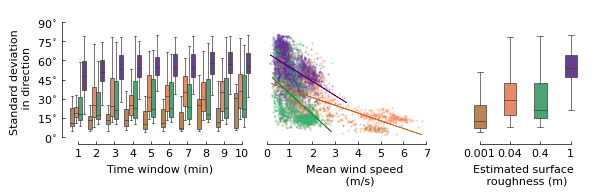

In [20]:
mpl.rcParams.update({'font.size': 8})

c=['peru', 'mediumseagreen', 'rebeccapurple', 'mediumseagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'rebeccapurple', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen']

fig, ax =plt.subplots(nrows=1, ncols=3, figsize=(6,2), layout='tight', gridspec_kw={'width_ratios':[1.5,1.5,1]})

#fig.subplots_adjust(right=0.9, wspace=0.8)
#gs = gridspec.GridSpec(1, 3, width_ratios=[3, 2.7, 2.7]) 
#ax[1].scatter(alltemp[0].speed_avg, np.abs(alltemp[0].direction_std),  s=1, color=c[0],  alpha=.4, label='desert/valley', rasterized=True)
#ax[1].scatter(alltemp[1].speed_avg, np.abs(alltemp[1].direction_std),  s=1, color=c[1],  alpha=.4, label='forest', rasterized=True)
#ax[1].scatter(alltemp[2].speed_avg, np.abs(alltemp[2].direction_std),  s=1, color=c[2],  alpha=.4, label='urban', rasterized=True)


for i in range(0,16):
    ax[1].scatter(alltemp[i].speed_avg, np.abs(alltemp[i].direction_std),  s=.4, color=c[i], alpha=.35, linewidth=None, rasterized=True)

#kwargs = {Rasterized=True}    
    
# add mean lines
slope, intercept = np.polyfit(desertchunks.speed_avg, desertchunks.direction_std, 1)
abline_values = [slope * i + intercept for i in desertchunks.speed_avg]
ax[1].plot(desertchunks.speed_avg, abline_values, 'chocolate', linewidth=.5)
slope, intercept = np.polyfit(forestchunks.speed_avg, forestchunks.direction_std, 1)
abline_values = [slope * i + intercept for i in forestchunks.speed_avg]
ax[1].plot(forestchunks.speed_avg, abline_values, 'forestgreen', linewidth=.5)
slope, intercept = np.polyfit(urbanchunks.speed_avg, urbanchunks.direction_std, 1)
abline_values = [slope * i + intercept for i in urbanchunks.speed_avg]
ax[1].plot(urbanchunks.speed_avg, abline_values, 'indigo', linewidth=.5)

minutesdf=alltempconcat.loc[alltempconcat['time'].isin([60,120,180,240,300,360,420,480,540,600])]
sns.boxplot(x='time', y='direction_std', hue='environment', data=minutesdf, showfliers=False,  palette=['peru', 'coral', 'mediumseagreen', 'rebeccapurple',], width=.9, linewidth=.5, ax=ax[0])    
sns.boxplot(x=minutesdf.environment, y=minutesdf.direction_std, showfliers=False, palette=['peru', 'coral', 'mediumseagreen', 'rebeccapurple',], width=.4, linewidth=.5, ax=ax[2])
ax[0].get_legend().remove()
ax[0].set_xticklabels([1,2,3,4,5,6,7,8,9,10])
ax[0].set_xlabel('Time window (min)')

#ax[0].set_rasterized(True)
#ax[2].set_rasterized(True)
ax[0].set_ylabel('Standard deviation \n in direction')
ax[1].set_xlabel('Mean wind speed  \n (m/s)')
ax[2].set_ylabel('')
ax[2].set_xlabel('Estimated surface \n roughness (m)')
ax[0].grid(False)
ax[1].grid(False)
ax[2].grid(False)

ax[0].set_ylim(0,90)
ax[1].set_ylim(0,90)
ax[2].set_ylim(0,90)
ax[1].set_xlim(0,8) 

ax[0].set_facecolor('white')
ax[1].set_facecolor('white')
ax[2].set_facecolor('white')



fifi.mpl_functions.adjust_spines(ax[0], ['left', 'bottom'],
                                yticks=[0,15, 30, 45, 60, 75, 90],
                                 #xticks=[1,100,500,1000],
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=.5)
fifi.mpl_functions.adjust_spines(ax[1], [ 'bottom'],
                                 xticks=[0,1,2,3,4, 5,6,7],
                                 tick_length=2.5,
                                 spine_locations={'bottom': 5},
                                 linewidth=.5)

fifi.mpl_functions.adjust_spines(ax[2], [ 'bottom'],
                                 #xticks=[.001,.04, .4, 1],
                                 tick_length=2.5,
                                 spine_locations={ 'bottom': 5},
                                 linewidth=.5)



evenyticks=np.arange(0, 100, 15)
yticklabels=[['$' + str(y) + '^{\circ}$' + '',] for y in evenyticks]
yticklabels=np.ravel(yticklabels)
ax[0].set_yticklabels(yticklabels)


ax[2].set_xticklabels([.001,.04, .4, 1])

#fig.savefig('regressionvariables_temporal_direction.svg', bbox_inches='tight', transparent=True, dpi=1800, format='svg')



## Speed

[Text(0, 0, '$0^{\\circ}$'),
 Text(15, 0, '$15^{\\circ}$'),
 Text(30, 0, '$30^{\\circ}$'),
 Text(45, 0, '$45^{\\circ}$'),
 Text(60, 0, '$60^{\\circ}$'),
 Text(75, 0, '$75^{\\circ}$'),
 Text(90, 0, '$90^{\\circ}$')]

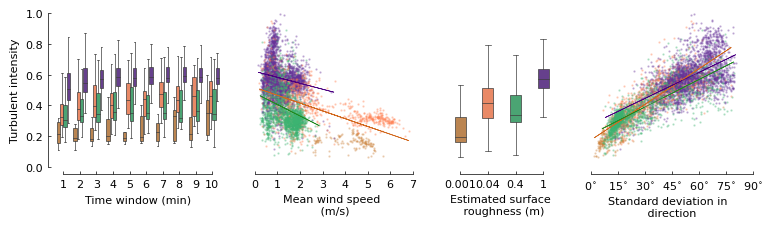

In [21]:
mpl.rcParams.update({'font.size': 8})

c=['peru','mediumseagreen', 'rebeccapurple', 'mediumseagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'rebeccapurple', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen']

fig, (ax1,ax2,ax3,ax4) =plt.subplots(nrows=1, ncols=4, figsize=(9,2), gridspec_kw={'width_ratios':[1.5,1.5,1,1.5]})


# add mean lines for ax2
slope, intercept = np.polyfit(desertchunks.speed_avg, desertchunks.turb_intensity, 1)
abline_values = [slope * i + intercept for i in desertchunks.speed_avg]
ax2.plot(desertchunks.speed_avg, abline_values, 'chocolate', linewidth=.5)
slope, intercept = np.polyfit(forestchunks.speed_avg, forestchunks.turb_intensity, 1)
abline_values = [slope * i + intercept for i in forestchunks.speed_avg]
ax2.plot(forestchunks.speed_avg, abline_values, 'forestgreen', linewidth=.5)
slope, intercept = np.polyfit(urbanchunks.speed_avg, urbanchunks.turb_intensity, 1)
abline_values = [slope * i + intercept for i in urbanchunks.speed_avg]
ax2.plot(urbanchunks.speed_avg, abline_values, 'indigo', linewidth=.5)





# add mean lines for ax4
slope, intercept = np.polyfit(desertchunks.direction_std, desertchunks.turb_intensity, 1)
abline_values = [slope * i + intercept for i in desertchunks.direction_std]
ax4.plot(desertchunks.direction_std, abline_values, 'chocolate', linewidth=.5)
slope, intercept = np.polyfit(forestchunks.direction_std, forestchunks.turb_intensity, 1)
abline_values = [slope * i + intercept for i in forestchunks.direction_std]
ax4.plot(forestchunks.direction_std, abline_values, 'forestgreen', linewidth=.5)
slope, intercept = np.polyfit(urbanchunks.direction_std, urbanchunks.turb_intensity, 1)
abline_values = [slope * i + intercept for i in urbanchunks.direction_std]
ax4.plot(urbanchunks.direction_std, abline_values, 'indigo', linewidth=.5)

for i in range(0,16):
    ax2.scatter(alltemp[i].speed_avg, alltemp[i].turb_intensity,  s=.4, color=c[i],alpha=.35, linewidth=None, rasterized=True)
    ax4.scatter(alltemp[i].direction_std,alltemp[i].turb_intensity,  s=.4, color=c[i], alpha=.35, linewidth=None, rasterized=True)
    
#sns.boxplot(x='time', y='vert_vel_std', hue='environment', data=allt1, showfliers=False, palette=['steelblue', 'seagreen', 'purple',], width=.7, ax=ax[0])    
minutesdf=alltempconcat.loc[alltempconcat['time'].isin([60,120,180,240,300,360,420,480,540,600])]
#minutesdf['abs_ver_vel']=np.abs()
sns.boxplot(x=minutesdf.time, y=minutesdf.turb_intensity, hue=minutesdf.environment, showfliers=False, palette=['peru','coral', 'mediumseagreen', 'rebeccapurple',], width=.8, linewidth=.5, ax=ax1)    
ax1.set_xticklabels([1,2,3,4,5,6,7,8,9,10])
ax1.set_xlabel('Time lags, minutes')
ax1.legend([],[], frameon=False)

sns.boxplot(x=alltempconcat.environment, y=alltempconcat.turb_intensity, showfliers=False, palette=['peru','coral', 'mediumseagreen', 'rebeccapurple',], width=.4, linewidth=.5, ax=ax3)

#xticks=np.arange(0,6300,300)
#ax[0].set_xticklabels(xticks)
ax3.set_xticklabels([.001, .04, .4, 1])
ax1.set_ylabel('Turbulent intensity')
ax1.set_xlabel('Time window (min)')  
ax2.set_xlabel('Mean wind speed \n (m/s)')
ax3.set_ylabel('')
ax4.set_xlabel('Standard deviation in \n direction')
ax3.set_xlabel('Estimated surface \n roughness (m)')
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
ax4.grid(False)

ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax3.set_ylim(0,1)
ax4.set_ylim(0,1)
#ax[1].set_xlim(0,7)
# Set log scale and spines

ax1.set_facecolor('white')
ax2.set_facecolor('white')
ax3.set_facecolor('white')


fifi.mpl_functions.adjust_spines(ax1, ['left', 'bottom'],
                                #yticks=np.arange(0,17,2)/10,
                                 #xticks=np.arange(1,11,1),
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=.5)
fifi.mpl_functions.adjust_spines(ax2, [ 'bottom'],
                                 xticks=np.arange(0,8,1),
                                 tick_length=2.5,
                                 spine_locations={'bottom': 5},
                                 linewidth=.5)
fifi.mpl_functions.adjust_spines(ax3, [ 'bottom'],
                                 #xticks=[0.001, 0.04, 0.4, 1],
                                 tick_length=2.5,
                                 spine_locations={'bottom': 5},
                                 linewidth=.5)

fifi.mpl_functions.adjust_spines(ax4, [ 'bottom'],
                                 xticks=[0,15,30,45,60,75,90],
                                 tick_length=2.5,
                                 spine_locations={ 'bottom': 5},
                                 linewidth=.5)
evenxticks=np.arange(0, 100, 15)
xticklabels=[['$' + str(x) + '^{\circ}$' + '',] for x in evenxticks]
xticklabels=np.ravel(xticklabels)
ax4.set_xticklabels(xticklabels)


#fig.savefig('temporal_regression_variables_TI.svg', bbox_inches='tight', transparent=True, dpi=1800, format='svg')


# Regression analysis

In [23]:
#normalize pandas columns
N=len(alltempconcat)+1
normalized_data = alltempconcat.iloc[:,0:N].apply(lambda iterator: ((iterator - iterator.mean())/iterator.std()).round(7))

In [24]:
normalized_data

,index,time,speed_std,direction_std,speed_avg,direction_avg,group,environment,turb_intensity
0,-1.228202,-1.605736,-0.879779,-0.507657,-0.216296,-0.301619,-1.776175,-1.483885,-1.326293
1,-1.222640,-1.495177,-0.162374,-1.826655,3.514240,-0.050508,-1.776175,-1.483885,-2.235564
2,-1.217079,-1.329339,0.293005,-1.657056,3.342069,-0.137313,-1.776175,-1.483885,-2.019891
3,-1.211517,-1.163500,-0.167113,-1.757269,3.572894,-0.108618,-1.776175,-1.483885,-2.245374
4,-1.205956,-0.997662,-0.786773,-0.718123,-0.109329,-0.226420,-1.776175,-1.483885,-1.313716
...,...,...,...,...,...,...,...,...,...
5770,0.145489,0.992397,-0.061881,0.134055,-0.280480,-1.807515,1.519696,-0.467896,0.225164
5771,0.151050,1.158236,0.183435,0.627597,-0.397361,0.153744,1.519696,-0.467896,1.081330
5772,0.156612,1.324074,0.217819,-0.062275,0.040163,-1.005264,1.519696,-0.467896,-0.086426
5773,0.162173,1.489912,-0.336426,0.813522,-0.300768,-0.844637,1.519696,-0.467896,-0.216129


## Direction

In [27]:
mod = smf.ols(formula='direction_std ~ environment*speed_avg + speed_avg*time', data=normalized_data)
res = mod.fit(cov_type='cluster', cov_kwds={'groups': alltempconcat.group})
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          direction_std   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     147.0
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           3.42e-12
Time:                        18:51:48   Log-Likelihood:                -6076.4
No. Observations:                5775   AIC:                         1.216e+04
Df Residuals:                    5769   BIC:                         1.220e+04
Df Model:                           5                                         
Covariance Type:              cluster                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.10

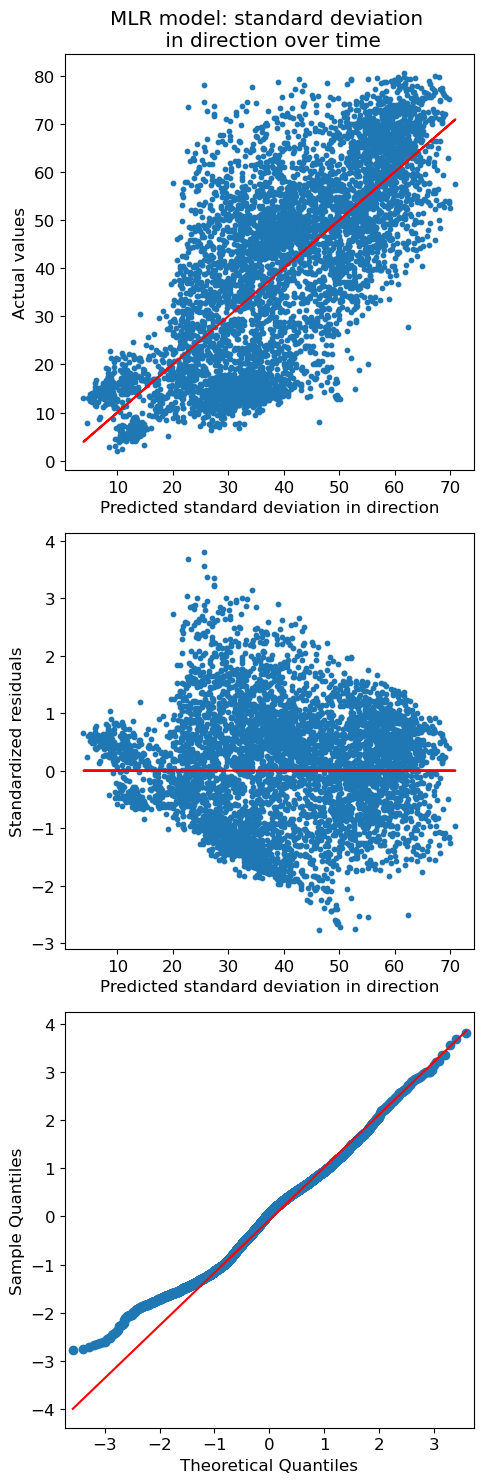

In [28]:
mod = smf.ols(formula='direction_std ~ environment*speed_avg + speed_avg*time', data=alltempconcat)
res = mod.fit(cov_type='cluster', cov_kwds={'groups': alltempconcat.group})
mpl.rcParams.update({'font.size': 12})

fig, ax =plt.subplots(nrows=3, ncols=1, figsize=(5,15), layout='tight')


slope, intercept = np.polyfit(res.fittedvalues, alltempconcat.direction_std, 1)
abline_values = [slope * i + intercept for i in res.fittedvalues]

ax[0].set_title('MLR model: standard deviation \n in direction over time')
ax[0].scatter(res.fittedvalues, alltempconcat.direction_std, s=10, rasterized=True)
ax[0].plot(res.fittedvalues, abline_values, 'r', rasterized=True )
ax[0].set_xlabel ('Predicted standard deviation in direction')
ax[0].set_ylabel ('Actual values')
#ax[0].set_xlim(-5,90)
#ax[0].set_ylim(-5,90)

slope, intercept = np.polyfit(res.fittedvalues, res.resid_pearson, 1)
abline_values = [slope * i + intercept for i in res.fittedvalues]

ax[1].scatter(res.fittedvalues, res.resid_pearson, s=10, rasterized=True)
ax[1].plot(res.fittedvalues, abline_values, 'r', rasterized=True )
ax[1].set_xlabel ('Predicted standard deviation in direction')
ax[1].set_ylabel ('Standardized residuals')


sm.qqplot(res.resid_pearson, line='q', ax=ax[2], rasterized=True )
plt.show()

#fig.savefig('regressionresidualtests_direction.svg', dpi=600, format='svg')


## Speed

In [29]:
mod = smf.ols(formula='turb_intensity ~ environment*direction_std + time*direction_std', data=normalized_data)
res = mod.fit(cov_type='cluster', cov_kwds={'groups': alltempconcat.group})
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         turb_intensity   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     98.70
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           6.24e-11
Time:                        18:52:22   Log-Likelihood:                -4581.2
No. Observations:                5775   AIC:                             9174.
Df Residuals:                    5769   BIC:                             9214.
Df Model:                           5                                         
Covariance Type:              cluster                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

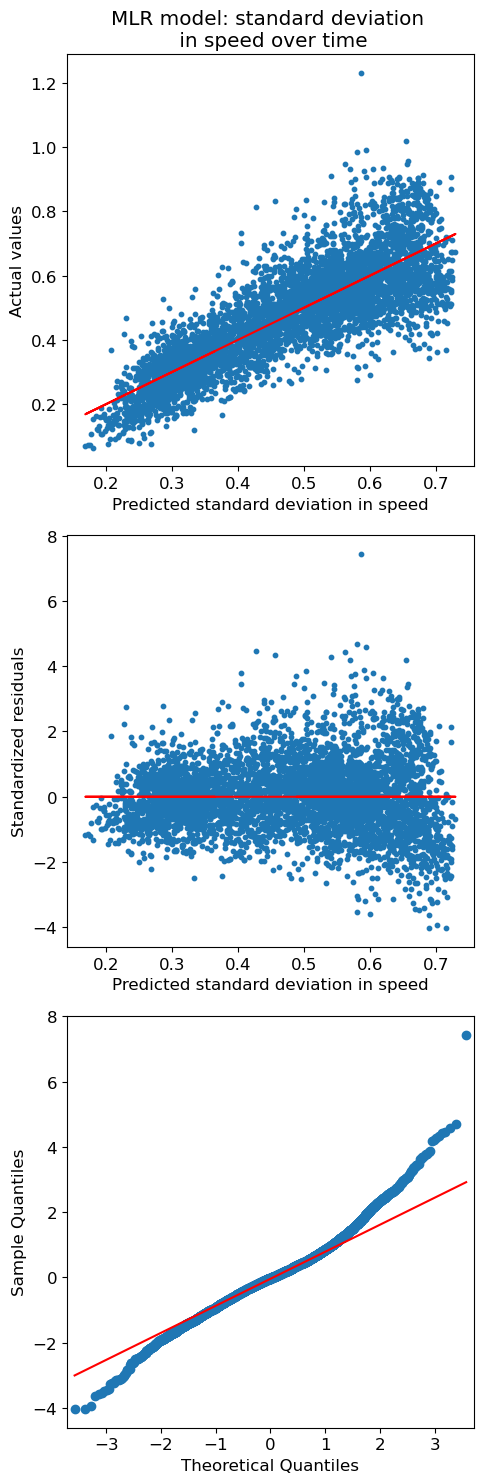

In [30]:
mod = smf.gls(formula='turb_intensity ~ environment*direction_std + time*direction_std', data=alltempconcat)
res = mod.fit(cov_type='cluster', cov_kwds={'groups': alltempconcat.group})


mpl.rcParams.update({'font.size': 12})

fig, ax =plt.subplots(nrows=3, ncols=1, figsize=(5,15), layout='tight')


slope, intercept = np.polyfit(res.fittedvalues, alltempconcat.turb_intensity, 1)
abline_values = [slope * i + intercept for i in res.fittedvalues]

ax[0].set_title('MLR model: standard deviation \n in speed over time')
ax[0].scatter(res.fittedvalues, alltempconcat.turb_intensity, s=10, rasterized=True)
ax[0].plot(res.fittedvalues, abline_values, 'r', rasterized=True )
ax[0].set_xlabel ('Predicted standard deviation in speed')
ax[0].set_ylabel ('Actual values')


slope, intercept = np.polyfit(res.fittedvalues, res.resid_pearson, 1)
abline_values = [slope * i + intercept for i in res.fittedvalues]

ax[1].scatter(res.fittedvalues, res.resid_pearson, s=10, rasterized=True)
ax[1].plot(res.fittedvalues, abline_values, 'r', rasterized=True )
ax[1].set_xlabel ('Predicted standard deviation in speed')
ax[1].set_ylabel ('Standardized residuals')


sm.qqplot(res.resid_pearson, line='q', ax=ax[2], rasterized=True )
plt.show()

#fig.savefig('regressionresidualtests_speed.svg', dpi=600, format='svg')

